In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
## importing our data from csv file
df = pd.read_csv (r'C:\Users\Ada\Desktop\Data.csv')
df

,RespondentID,Do you typically check a daily weather report?,How do you typically check the weather?,A specific website or app (please provide the answer),"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887159451,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,-
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,3887145426,Yes,The default weather app on your phone,-,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic
...,...,...,...,...,...,...,...,...,...
923,3877568054,Yes,The Weather Channel,-,Very likely,45 - 59,Female,Prefer not to answer,Pacific
924,3877568053,Yes,The default weather app on your phone,-,Very likely,30 - 44,Female,Prefer not to answer,South Atlantic
925,3877566926,Yes,Local TV News,-,Somewhat likely,60+,Female,Prefer not to answer,Pacific
926,3877551536,No,-,-,-,-,-,-,-


In [3]:
# describing numeric variables
df.describe()

,RespondentID
count,9.280000e+02
mean,3.879108e+09
std,2.479463e+06
min,3.877549e+09
25%,3.877793e+09
50%,3.878061e+09
75%,3.878774e+09
max,3.887201e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 9 columns):
 #   Column                                                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                                                        --------------  ----- 
 0   RespondentID                                                                                                                                  928 non-null    int64 
 1   Do you typically check a daily weather report?                                                                                                928 non-null    object
 2   How do you typically check the weather?                                                                                                       928 non-null    object
 3   A specific website or app (please provide

In [5]:
# ckecking duplicates
sum(df.duplicated())

0

In [6]:
#checking missing values
df.isnull().sum()

RespondentID                                                                                                                                    0
Do you typically check a daily weather report?                                                                                                  0
How do you typically check the weather?                                                                                                         0
A specific website or app (please provide the answer)                                                                                           0
If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?    0
Age                                                                                                                                             0
What is your gender?                                                                                                        

In [7]:
# renaming necessary column
df=df.rename(columns = {'If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?':'Watch_checking'})

In [8]:
# removing not appropriate or incosistent values
df = df[df.Age != '-']

In [10]:
df = df[df.Watch_checking != '-']

In [11]:
df['Age'].value_counts()

45 - 59    278
60+        258
30 - 44    204
18 - 29    176
Name: Age, dtype: int64

In [12]:
group=df.groupby('Age')['Watch_checking'].value_counts().reset_index(name = 'values')
group

,Age,Watch_checking,values
0,18 - 29,Very likely,68
1,18 - 29,Somewhat likely,61
2,18 - 29,Very unlikely,36
3,18 - 29,Somewhat unlikely,11
4,30 - 44,Very likely,71
5,30 - 44,Somewhat likely,68
6,30 - 44,Very unlikely,51
7,30 - 44,Somewhat unlikely,14
8,45 - 59,Very likely,128
9,45 - 59,Somewhat likely,73


In [13]:
# creating a pivot table in order to visualize it comfortably
table = pd.pivot_table(group,values='values', index=['Age'],
                    columns=['Watch_checking'], aggfunc=np.sum)

In [14]:
table

Watch_checking,Somewhat likely,Somewhat unlikely,Very likely,Very unlikely
Age,,,,
18 - 29,61,11,68,36
30 - 44,68,14,71,51
45 - 59,73,20,128,57
60+,71,28,95,64


In [15]:
table2 = table.div(table.sum(axis = 1), axis = 0) * 100
table2

Watch_checking,Somewhat likely,Somewhat unlikely,Very likely,Very unlikely
Age,,,,
18 - 29,34.659091,6.250000,38.636364,20.454545
30 - 44,33.333333,6.862745,34.803922,25.000000
45 - 59,26.258993,7.194245,46.043165,20.503597
60+,27.519380,10.852713,36.821705,24.806202


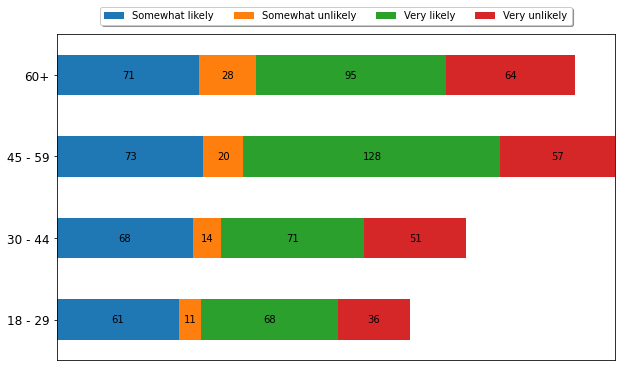

In [16]:
### The link between Watch_checking and subjects age

ax1 = table.plot(kind = 'barh', stacked = True,figsize=(10, 6))
plt.title(' ', size = 20)
plt.ylabel('')
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.yticks(rotation=360, size = 12)
plt.xlim(0, np.sum(table, axis=1).max())
plt.legend()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),ncol=4, fancybox=True, shadow=True)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
         ax.annotate(f'{width:0.0f}', xy=(left+width/2, bottom+height/2), ha='center', va='center');

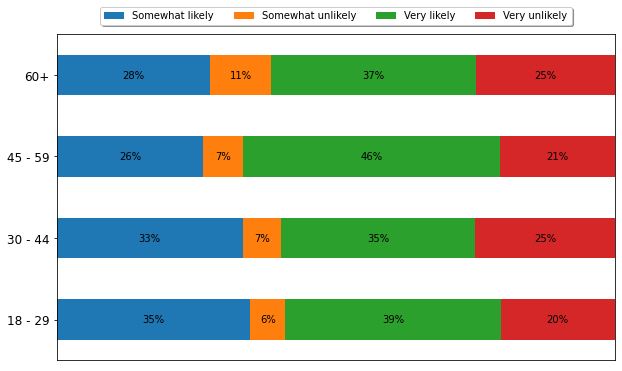

In [17]:
### The link between Watch_checking and subjects age(percentages) 


table2.plot(kind = 'barh', stacked = True,figsize=(10, 6))
plt.title(' ', size = 20)
plt.ylabel('')
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.yticks(rotation=360, size = 12)
plt.xlim(0, np.sum(table2, axis=1).max())
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
        ax.annotate(f'{width:0.0f}%', xy=(left+width/2, bottom+height/2), ha='center', va='center');
plt.legend()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),ncol=4, fancybox=True, shadow=True)

In [18]:
### The same plots we will create via OOP

In [19]:
watch_checking = ['Somewhat likely', 'Somewhat unlikely',
                  'Very likely', 'Very unlikely']
results = {
    '18-29': [61,11,68,36],
    '30-44': [68,14,71,51],
    '45-59': [73,20,128,57],
    '60+': [71,28,95,64]
}

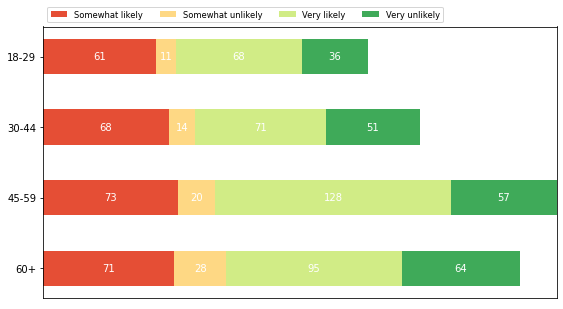

In [21]:
def plot1(results, watch_checking):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(watch_checking, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(watch_checking), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


plot1(results, watch_checking)
plt.show()
    
    

In [22]:
watch_checking2 = ['Somewhat likely', 'Somewhat unlikely',
                  'Very likely', 'Very unlikely']
results = {
    '18-29': [35,6,39,20],
    '30-44': [33,7,35,25],
    '45-59': [26,7,46,21],
    '60+': [28,11,37,25]
}

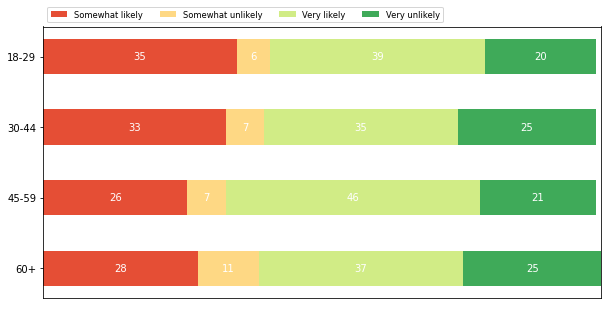

In [23]:
def plot2(results, watch_checking2):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(watch_checking2, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(watch_checking2), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


plot2(results, watch_checking2)
plt.show()
    

In [24]:
import matplotlib.gridspec as gridspec


Text(0, 0, 'to check weather via gadjets despite their age')

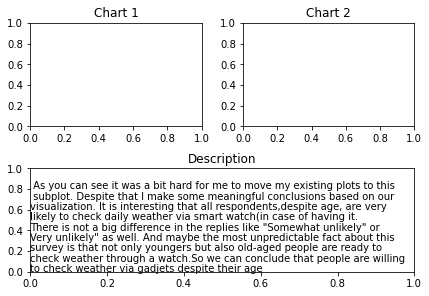

In [25]:

fig2= plt.figure(constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=2, nrows=2, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax1.set_title('Chart 1')
f2_ax2 = fig2.add_subplot(spec2[0, 1])
f2_ax2.set_title('Chart 2')
f2_ax3 = fig2.add_subplot(spec2[1,:])
f2_ax3.set_title('Description')
f2_ax3.text(0,0.8,' As you can see it was a bit hard for me to move my existing plots to this')
f2_ax3.text(0,0.7,' subplot. Despite that I make some meaningful conclusions based on our')   
f2_ax3.text(0,0.6,'visualization. It is interesting that all respondents,despite age, are very ')
f2_ax3.text(0,0.5,'likely to check daily weather via smart watch(in case of having it.')         
f2_ax3.text(0,0.4,'There is not a big difference in the replies like "Somewhat unlikely" or')        
f2_ax3.text(0,0.3,'Very unlikely" as well. And maybe the most unpredictable fact about this')
f2_ax3.text(0,0.2,'survey is that not only youngers but also old-aged people are ready to')
f2_ax3.text(0,0.1,'check weather through a watch.So we can conclude that people are willing')
f2_ax3.text(0,0,'to check weather via gadjets despite their age')
            
    
